#Step 1: Plot nullclines




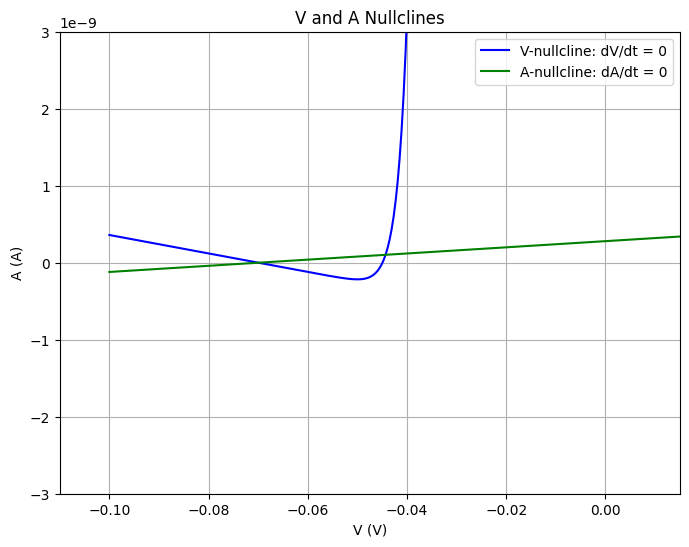

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

# Constants
g_mem = 12e-9  # Membrane conductance (S)
C_mem = 200e-12  # Membrane capacitance (F)
D_T = 2e-3  # Slope factor (V)
V_T = -50e-3  # Threshold voltage (V)
V_L = -70e-3  # Leak voltage (V)
g_A = 4e-9  # A-type conductance (S)
tau_A = 500e-3  # Time constant (s)


# Set x-axis range
V_vals = np.linspace(-0.1, 0.1, 500)

# Compute the nullclines
# V - nullcline: dV/dt = 0 = -(g_mem/C_mem) * (V_vals - V_L) + (g_mem/C_mem) * D_T * np.exp((V_vals - V_T) / D_T) - A/Cmem
# Express A explicitly in ters of V: A = C_mem *(-(g_mem/C_mem) * (V_vals - V_L) + (g_mem/C_mem) * D_T * np.exp((V_vals - V_T) / D_T))
# C_mem cancels out and we have A =  -g_mem * (V_vals - V_L) + g_mem * D_T * np.exp((V_vals - V_T) / D_T)
A_vals_V = -g_mem * (V_vals - V_L) + g_mem * D_T * np.exp((V_vals - V_T) / D_T)

# A - nullcline: dA/dt = 0 = (g_A/tau_A) * (V_vals - V_L) - A/tau_A
# Solve for A and tau_A cancels out: A = g_A * (V_vals - V_L)
A_vals_A = g_A * (V_vals - V_L)

# Plot the nullclines
plt.figure(figsize=(8, 6))
plt.plot(V_vals, A_vals_V, color='blue', label="V-nullcline: dV/dt = 0")
plt.plot(V_vals, A_vals_A, color='green', label="A-nullcline: dA/dt = 0")

plt.xlabel("V (V)")
plt.ylabel("A (A)")
plt.title("V and A Nullclines")
plt.legend()
plt.grid(True)

# Set axis limits
plt.xlim(-0.11, 0.015)
plt.ylim(-0.000000003, 0.000000003)

plt.show()


By visual inspection I see the equilibrium points should be around -0.07 and -0.045

# Step 2: Find equilibrium points

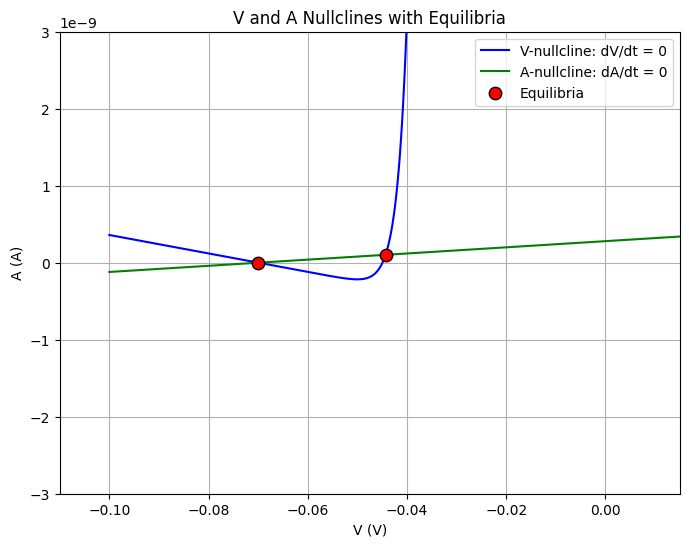

Equilibrium 1: V = -0.070000 V, A = 2.724089e-16 A
Equilibrium 2: V = -0.044319 V, A = 1.027221e-10 A


In [ ]:
# Define the nullcline functions
def V_nullcline(V):
    return -g_mem * (V - V_L) + g_mem * D_T * np.exp((V - V_T) / D_T)

def A_nullcline(V):
    return g_A * (V - V_L)

# Equation of intersection: V_nullcline(V) - A_nullcline(V) = 0
def intersection_eq(V):
    return V_nullcline(V) - A_nullcline(V)

# Find intersections (equilibrium points)
initial_guesses = [-0.07, -0.045]  # initial guesses based on visual inspection
V_intersections = fsolve(intersection_eq, initial_guesses) #use fsolve, function that returns roots of non-linear equations, given starting estimates
A_intersections = V_nullcline(V_intersections) # compute A values at equilibrium points

# X-range
V_vals = np.linspace(-0.1, 0.015, 500)

# Compute nullclines for plotting
A_vals_V = V_nullcline(V_vals)
A_vals_A = A_nullcline(V_vals)

# Plot nullclines
plt.figure(figsize=(8, 6))
plt.plot(V_vals, A_vals_V, color='blue', label="V-nullcline: dV/dt = 0")
plt.plot(V_vals, A_vals_A, color='green', label="A-nullcline: dA/dt = 0")

# Mark the equilibrium points
plt.scatter(V_intersections, A_intersections, color='red', zorder=3, label="Equilibria", s=80, edgecolors='black')
plt.xlabel("V (V)")
plt.ylabel("A (A)")
plt.title("V and A Nullclines with Equilibria")
plt.legend()
plt.grid(True)

plt.xlim(-0.11, 0.015)
plt.ylim(-3e-9, 3e-9)

plt.show()

for i in range(len(V_intersections)):
    print(f"Equilibrium {i+1}: V = {V_intersections[i]:.6f} V, A = {A_intersections[i]:.6e} A")




# Step 3: Determine stability of equilibria

# 3. a) Find eigenvalues of equilibrium points

In [ ]:
# Define functions f(V, A) and g(V, A)
def f(V, A):
    return -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem

def g(V, A):
    return (g_A/tau_A) * (V - V_L) - A/tau_A

# Define Jacobian matrix
def jacobian(V, A):
    df_dV = -(g_mem/C_mem) + (g_mem/C_mem) * np.exp((V - V_T) / D_T)
    df_dA = -1 / C_mem
    dg_dV = g_A / tau_A
    dg_dA = -1 / tau_A
    return np.array([[df_dV, df_dA], [dg_dV, dg_dA]])

# Compute eigenvalues at each equilibrium point
for i in range(len(V_intersections)):
    V_eq, A_eq = V_intersections[i], A_intersections[i]
    J = jacobian(V_eq, A_eq)
    eigenvalues = np.linalg.eigvals(J)

    print(f"Equilibrium {i+1}: V = {V_eq:.6f} V, A = {A_eq:.6e} A")
    print(f"Jacobian Matrix at equilibrium:")
    print(J)
    print(f"Eigenvalues: {eigenvalues}")

    # determine stability
    if np.all(eigenvalues < 0):
        print("Stability: Stable (Attracting Node)")
    elif np.all(eigenvalues > 0):
        print("Stability: Unstable (Repelling Node)")
    elif np.any(eigenvalues > 0) and np.any(eigenvalues < 0):
        print("Stability: Saddle Point (Unstable)")
    print("-----------------------------")


Equilibrium 1: V = -0.070000 V, A = 2.724089e-16 A
Jacobian Matrix at equilibrium:
[[-5.99972759e+01 -5.00000000e+09]
 [ 8.00000000e-09 -2.00000000e+00]]
Eigenvalues: [-59.29918571  -2.6980902 ]
Stability: Stable (Attracting Node)
-----------------------------
Equilibrium 2: V = -0.044319 V, A = 1.027221e-10 A
Jacobian Matrix at equilibrium:
[[ 9.67221461e+02 -5.00000000e+09]
 [ 8.00000000e-09 -2.00000000e+00]]
Eigenvalues: [967.18018907  -1.958728  ]
Stability: Saddle Point (Unstable)
-----------------------------


# 3. b) Find eigenvectors of corresponding eigenvalues

In [ ]:
import numpy as np

# Define Jacobian elements
def jacobian(V_eq, A_eq, g_mem, C_mem, D_T, V_T, g_A, tau_A):
    J11 = (-g_mem / C_mem) + (g_mem / C_mem) * np.exp((V_eq - V_T) / D_T)
    J12 = -1 / C_mem
    J21 = g_A / tau_A

    J22 = -1 / tau_A
    return np.array([[J11, J12], [J21, J22]])

# Example equilibrium points
V_eq = np.array([-0.070000, -0.044319])  # replace with actual equilibrium V values
A_eq = (-g_mem * (V_eq - V_L) + g_mem * D_T * np.exp((V_eq - V_T) / D_T))  # replace with actual A_eq values

# Compute eigenvalues and eigenvectors
for i in range(len(V_eq)):
    J = jacobian(V_eq[i], A_eq[i], g_mem, C_mem, D_T, V_T, g_A, tau_A)
    eigvals, eigvecs = np.linalg.eig(J)
    print(f"Equilibrium {i+1}:")
    print("Eigenvalues:", eigvals)
    print("Eigenvectors:\n", eigvecs)


Equilibrium 1:
Eigenvalues: [-59.29918581  -2.6980902 ]
Eigenvectors:
 [[-1.00000000e+00  1.00000000e+00]
 [ 1.39618040e-10 -1.14598372e-08]]
Equilibrium 2:
Eigenvalues: [967.41827173  -1.95873814]
Eigenvectors:
 [[1.00000000e+00 1.00000000e+00]
 [8.25237179e-12 1.93883654e-07]]


# Step 4. Draw a phase portrait
Procedure I followed:
https://www.youtube.com/watch?v=9SK6m5k0LmY
https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/
https://github.com/AleksandarHaber/Phase-portraits-of-dynamical-systems-and-state-space-models-in-Python/blob/main/phasePortraitPython.py


# 4. a) Draw a vector field

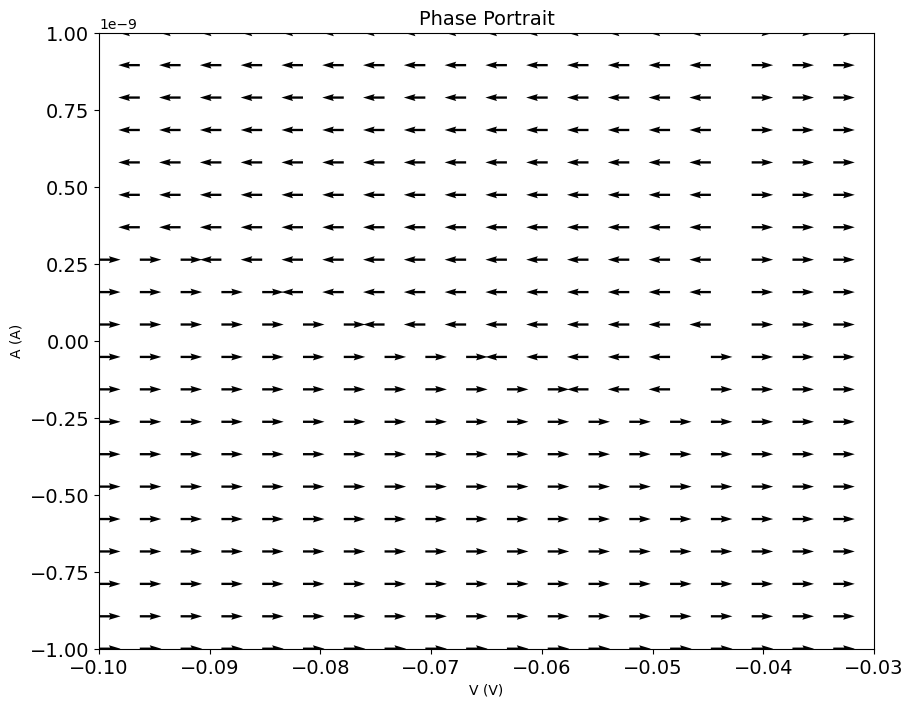

In [ ]:
def dynamicsStateSpace(state, t):
  V, A = state #state variables

  dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem
  dAdt = (g_A/tau_A) * (V - V_L) - A/tau_A

  return [dVdt, dAdt]


# Define grid of points
V_vals_grid = np.linspace(-0.1, -0.03, 20)
A_vals_grid = np.linspace(-1e-9, 1e-9, 20)
V, A = np.meshgrid(V_vals_grid, A_vals_grid)

# Initialize derivative arrays
dV = np.zeros(V.shape)
dA = np.zeros(A.shape)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        derivatives = dynamicsStateSpace([V[i,j], A[i,j]], 0)
        dV[i,j] = derivatives[0]
        dA[i,j] = derivatives[1]

# Normalize the vectors
magnitude = np.sqrt(dV**2 + dA**2)
dV = dV / (magnitude + 1e-12)  # adding a small number to avoid division by zero
dA = dA / (magnitude + 1e-12)


# Plot phase portrait
plt.figure(figsize=(10, 8))
plt.quiver(V, A, dV, dA, color='black', width=0.003) #use quiver to plot a 2d grid of arrows
plt.xlim(-0.1, -0.03)
plt.ylim(-1e-9, 1e-9)
plt.title('Phase Portrait', fontsize=14)
plt.xlabel('V (V)')
plt.ylabel('A (A)')
plt.tick_params(axis='both', which='major', labelsize=14)



plt.savefig('phasePortrait_with_equilibria_trajectory.png', dpi=300)
plt.show()

# 4. b) Phase portrait with multiple state trajectories

<ipython-input-1-088e23f80b77>:92: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(dynamicsStateSpace, init_state, simulation_time)


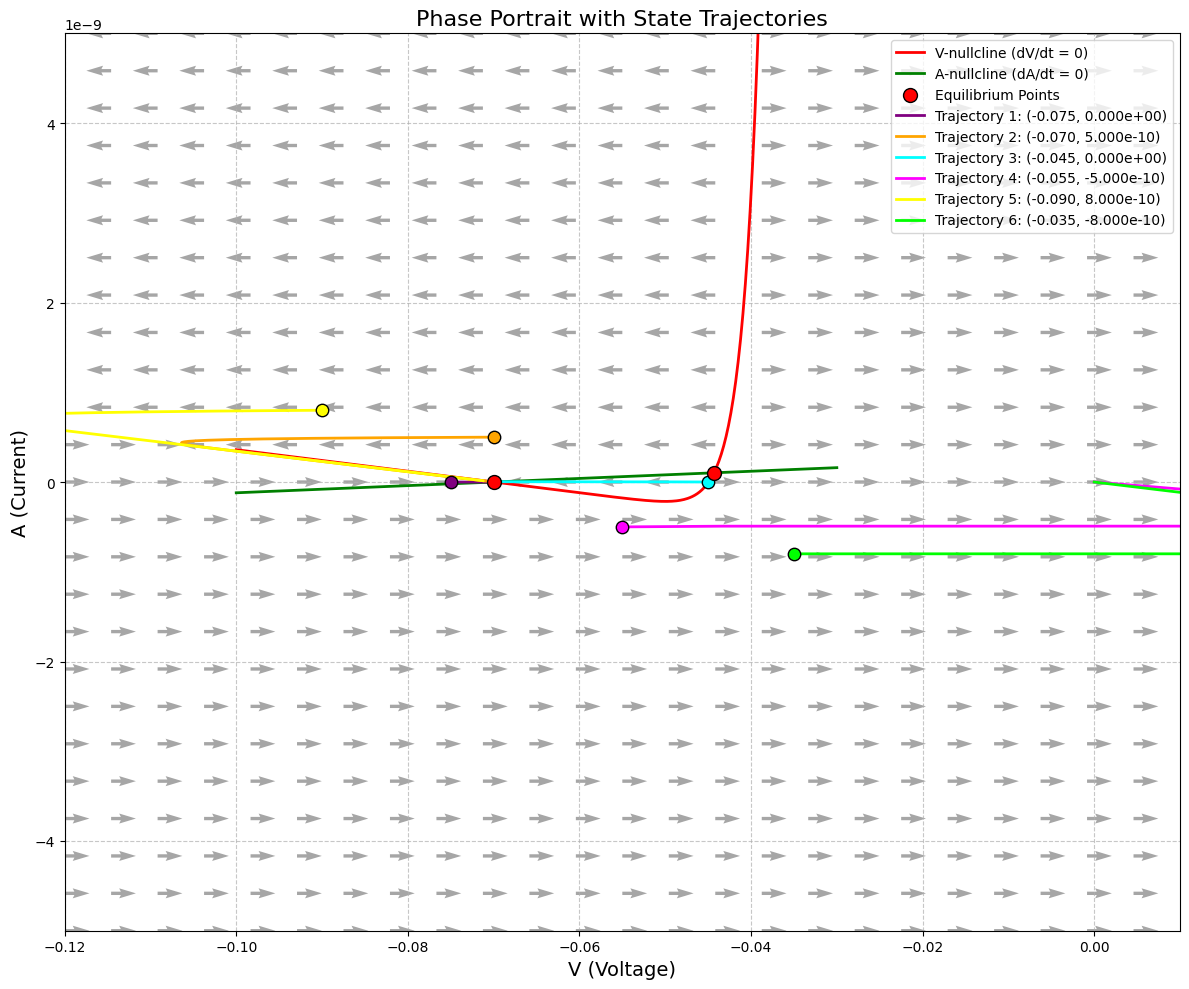

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import fsolve

# constants
g_mem = 12e-9    # Membrane conductance (S)
C_mem = 200e-12  # Membrane capacitance (F)
D_T = 2e-3       # Slope factor (V)
V_T = -50e-3     # Threshold voltage (V)
V_L = -70e-3     # Leak voltage (V)
g_A = 4e-9       # A-type conductance (S)
tau_A = 500e-3   # Time constant (s)

def dynamicsStateSpace(state, t):
    V, A = state #state variables

    dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem
    dAdt = (g_A/tau_A) * (V - V_L) - A/tau_A

    return [dVdt, dAdt]

# define grid of points
V_vals_grid = np.linspace(-0.12, 0.01, 25)  # Extended voltage range
A_vals_grid = np.linspace(-5e-9, 5e-9, 25)  # Extended current range

V, A = np.meshgrid(V_vals_grid, A_vals_grid)

#initialize derivative arrays
dV = np.zeros(V.shape)
dA = np.zeros(A.shape)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        derivatives = dynamicsStateSpace([V[i,j], A[i,j]], 0)
        dV[i,j] = derivatives[0]
        dA[i,j] = derivatives[1]

# normalize the vectors
magnitude = np.sqrt(dV**2 + dA**2)
dV = dV / (magnitude + 1e-12)  # adding a small number to avoid division by zero
dA = dA / (magnitude + 1e-12)

#get equilibrium points from previous calculations
def V_nullcline(V):
    return -g_mem * (V - V_L) + g_mem * D_T * np.exp((V - V_T) / D_T)

def A_nullcline(V):
    return g_A * (V - V_L)

def intersection_eq(V):
    return V_nullcline(V) - A_nullcline(V)

initial_guesses = [-0.07, -0.045]
V_intersections = fsolve(intersection_eq, initial_guesses)
A_intersections = V_nullcline(V_intersections)

# Define several initial states to simulate trajectories
# Including points near each equilibrium point and other points of interest
initial_states = [
    [-0.075, 0],          # near stable node
    [-0.07, 0.5e-9],      # near stable node, different direction
    [-0.045, 0],          # near saddle point
    [-0.055, -0.5e-9],    # between equilibrium points
    [-0.09, 0.8e-9],      # upper left region
    [-0.035, -0.8e-9]     # lower right region
]

# simulation time
simulation_time = np.linspace(0, 1.5, 1500)

#plotting
plt.figure(figsize=(12, 10))

#plot the nullclines
V_vals = np.linspace(-0.1, -0.03, 500)
A_vals_V = V_nullcline(V_vals)
A_vals_A = A_nullcline(V_vals)
plt.plot(V_vals, A_vals_V, 'r-', linewidth=2, label='V-nullcline (dV/dt = 0)')
plt.plot(V_vals, A_vals_A, 'g-', linewidth=2, label='A-nullcline (dA/dt = 0)')

# plot vector field
plt.quiver(V, A, dV, dA, color='gray', width=0.003, alpha=0.7)

# plot equilibrium points
plt.scatter(V_intersections, A_intersections, color='r', s=100,
            edgecolors='black', zorder=5, label='Equilibrium Points')

# plot trajectories
colors = ['purple', 'orange', 'cyan', 'magenta', 'yellow', 'lime']
for i, init_state in enumerate(initial_states):
    solution = odeint(dynamicsStateSpace, init_state, simulation_time)
    plt.plot(solution[:, 0], solution[:, 1], color=colors[i], linewidth=2,
             label=f'Trajectory {i+1}: ({init_state[0]:.3f}, {init_state[1]:.3e})')

    # mark the starting point with a dot
    plt.scatter(init_state[0], init_state[1], color=colors[i], s=80,
                edgecolors='black', zorder=4)

plt.xlim(-0.12, 0.01)
plt.ylim(-5e-9, 5e-9)
plt.xlabel('V (Voltage)', fontsize=14)
plt.ylabel('A (Current)', fontsize=14)
plt.title('Phase Portrait with State Trajectories', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

plt.savefig('phase_portrait_with_trajectories.png', dpi=300)
plt.show()

<ipython-input-1-e98aae5bb71b>:95: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(dynamicsStateSpace, init_state, simulation_time)


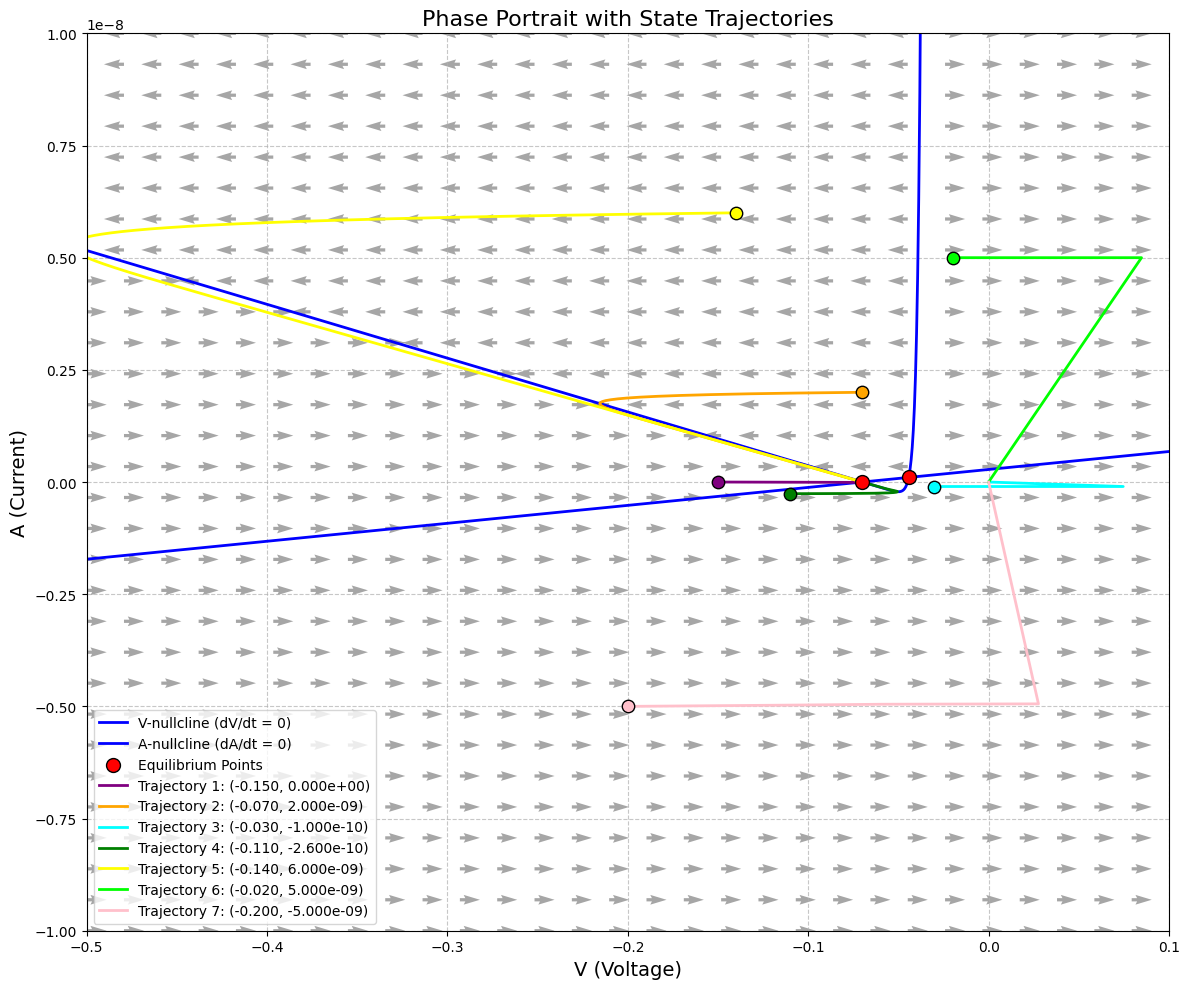

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from scipy.optimize import fsolve

# constants
g_mem = 12e-9    # Membrane conductance (S)
C_mem = 200e-12  # Membrane capacitance (F)
D_T = 2e-3       # Slope factor (V)
V_T = -50e-3     # Threshold voltage (V)
V_L = -70e-3     # Leak voltage (V)
g_A = 4e-9       # A-type conductance (S)
tau_A = 500e-3   # Time constant (s)

def dynamicsStateSpace(state, t):
    V, A = state #state variables

    dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem
    dAdt = (g_A/tau_A) * (V - V_L) - A/tau_A

    return [dVdt, dAdt]

# define grid of points
V_vals_grid = np.linspace(-0.50, 0.1, 30)  # extended range
A_vals_grid = np.linspace(-10e-9, 10e-9, 30)  # extended range

V, A = np.meshgrid(V_vals_grid, A_vals_grid)

#initialize derivative arrays
dV = np.zeros(V.shape)
dA = np.zeros(A.shape)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        derivatives = dynamicsStateSpace([V[i,j], A[i,j]], 0)
        dV[i,j] = derivatives[0]
        dA[i,j] = derivatives[1]

# normalize the vectors
magnitude = np.sqrt(dV**2 + dA**2)
dV = dV / (magnitude + 1e-12)  # adding a small number to avoid division by zero
dA = dA / (magnitude + 1e-12)

#get equilibrium points from previous calculations
def V_nullcline(V):
    return -g_mem * (V - V_L) + g_mem * D_T * np.exp((V - V_T) / D_T)

def A_nullcline(V):
    return g_A * (V - V_L)

def intersection_eq(V):
    return V_nullcline(V) - A_nullcline(V)

initial_guesses = [-0.07, -0.045]
V_intersections = fsolve(intersection_eq, initial_guesses)
A_intersections = V_nullcline(V_intersections)

# Define several initial states to simulate trajectories
# Including points near each equilibrium point and other points of interest
initial_states = [
    [-0.15, 0],          # trajectpry 1, near stable node, purple
    [-0.07, 2.0e-9],     # trajectory 2, near stable node, different direction, orange
    [-0.03, -0.1e-9],        # trajectpry 3, near saddle point, cyan
    [-0.11, -0.26e-9],    # trajectory 4, near stable node
    [-0.14, 6e-9],      # upper left region
    [-0.02, 5e-9],     # lower right region
    [-0.20, -5e-9],
]

# simulation time
simulation_time = np.linspace(0, 2, 2000)  # Extended simulation time

#plotting
plt.figure(figsize=(12, 10))

#plot the nullclines
V_vals = np.linspace(-0.50, 0.1, 1000)
A_vals_V = V_nullcline(V_vals)
A_vals_A = A_nullcline(V_vals)
plt.plot(V_vals, A_vals_V, 'blue', linewidth=2, label='V-nullcline (dV/dt = 0)')
plt.plot(V_vals, A_vals_A, 'blue', linewidth=2, label='A-nullcline (dA/dt = 0)')

# plot vector field
plt.quiver(V, A, dV, dA, color='gray', width=0.003, alpha=0.7)



# plot equilibrium points
plt.scatter(V_intersections, A_intersections, color='r', s=100,
            edgecolors='black', zorder=5, label='Equilibrium Points')

# plot trajectories
colors = ['purple', 'orange', 'cyan', 'green', 'yellow', 'lime', 'pink']
for i, init_state in enumerate(initial_states):
    solution = odeint(dynamicsStateSpace, init_state, simulation_time)
    plt.plot(solution[:, 0], solution[:, 1], color=colors[i], linewidth=2,
             label=f'Trajectory {i+1}: ({init_state[0]:.3f}, {init_state[1]:.3e})')

    # mark the starting point with a dot
    plt.scatter(init_state[0], init_state[1], color=colors[i], s=80,
                edgecolors='black', zorder=4)

plt.xlim(-0.50, 0.1)
plt.ylim(-10e-9, 10e-9)
plt.xlabel('V (Voltage)', fontsize=14)
plt.ylabel('A (Current)', fontsize=14)
plt.title('Phase Portrait with State Trajectories', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

plt.savefig('phase_portrait_with_trajectories.png', dpi=300)
plt.show()


# 4. c) Phase portrait with basin of attraction

Equilibria: (-0.070000, 2.724089e-16), (-0.044319, 1.027221e-10)
Calculating basin of attraction on a 90x70 grid (6300 points)...
Progress: 0.0% - Elapsed: 0.0s - Est. remaining: 0.0s


<ipython-input-19-71979c885bab>:21: RuntimeWarning: overflow encountered in exp
  dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem
<ipython-input-19-71979c885bab>:21: RuntimeWarning: invalid value encountered in scalar add
  dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem


Progress: 5.7% - Elapsed: 2.1s - Est. remaining: 35.1s
Progress: 10.0% - Elapsed: 4.0s - Est. remaining: 36.3s
Progress: 15.7% - Elapsed: 6.0s - Est. remaining: 32.0s
Progress: 20.0% - Elapsed: 7.4s - Est. remaining: 29.6s
Progress: 25.7% - Elapsed: 10.2s - Est. remaining: 29.6s
Progress: 30.0% - Elapsed: 12.0s - Est. remaining: 28.0s
Progress: 35.7% - Elapsed: 14.9s - Est. remaining: 26.8s
Progress: 40.0% - Elapsed: 17.4s - Est. remaining: 26.1s
Progress: 45.7% - Elapsed: 19.3s - Est. remaining: 23.0s
Progress: 50.0% - Elapsed: 20.8s - Est. remaining: 20.8s
Progress: 55.7% - Elapsed: 21.9s - Est. remaining: 17.4s
Progress: 60.0% - Elapsed: 22.6s - Est. remaining: 15.1s
Progress: 65.7% - Elapsed: 23.5s - Est. remaining: 12.3s
Progress: 70.0% - Elapsed: 24.2s - Est. remaining: 10.4s
Progress: 75.7% - Elapsed: 25.2s - Est. remaining: 8.1s
Progress: 80.0% - Elapsed: 25.9s - Est. remaining: 6.5s
Progress: 85.7% - Elapsed: 26.9s - Est. remaining: 4.5s
Progress: 90.0% - Elapsed: 27.6s - Est.

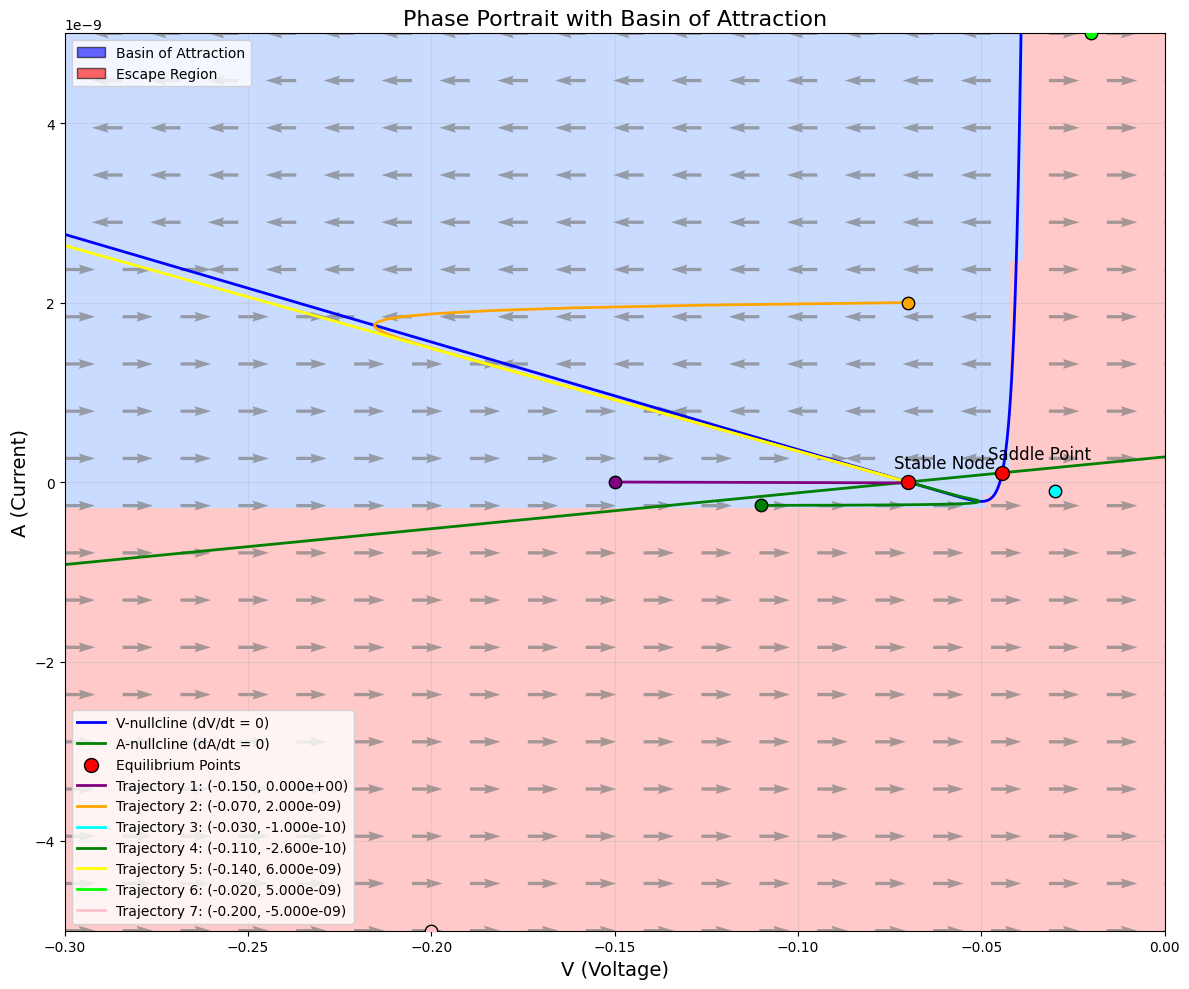

Total execution time: 30.9 seconds


In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
from scipy.optimize import fsolve
from matplotlib.colors import ListedColormap
import time

# track execution time
start_time = time.time()

g_mem = 12e-9    # Membrane conductance (S)
C_mem = 200e-12  # Membrane capacitance (F)
D_T = 2e-3       # Slope factor (V)
V_T = -50e-3     # Threshold voltage (V)
V_L = -70e-3     # Leak voltage (V)
g_A = 4e-9       # A-type conductance (S)
tau_A = 500e-3   # Time constant (s)

def dynamicsStateSpace(t, state):
    V, A = state
    dVdt = -(g_mem/C_mem) * (V - V_L) + (g_mem/C_mem) * D_T * np.exp((V - V_T) / D_T) - A/C_mem
    dAdt = (g_A/tau_A) * (V - V_L) - A/tau_A
    return [dVdt, dAdt]

def V_nullcline(V):
    return -g_mem * (V - V_L) + g_mem * D_T * np.exp((V - V_T) / D_T)

def A_nullcline(V):
    return g_A * (V - V_L)

def intersection_eq(V):
    return V_nullcline(V) - A_nullcline(V)

initial_guesses = [-0.07, -0.045]
V_intersections = fsolve(intersection_eq, initial_guesses)
A_intersections = V_nullcline(V_intersections)
print(f"Equilibria: ({V_intersections[0]:.6f}, {A_intersections[0]:.6e}), ({V_intersections[1]:.6f}, {A_intersections[1]:.6e})")


# **Create a grid for basin calculation**
num_v = 90
num_a = 70
v_min, v_max = -0.3, 0.0
a_min, a_max = -5e-9, 5e-9

# **Create meshgrid for basin calculation**
V_grid = np.linspace(v_min, v_max, num_v)
A_grid = np.linspace(a_min, a_max, num_a)
Vg, Ag = np.meshgrid(V_grid, A_grid)

# **initialize basin array (0 for basin, 1 for escape)**
basin_map = np.zeros((num_a, num_v))

print(f"Calculating basin of attraction on a {num_v}x{num_a} grid ({num_v*num_a} points)...")

t_span = (0, 1.5)  # time span
rtol = 1e-3        # tolerance
atol = 1e-7        # tolerance

# **Determine fate for each grid point with a progress indicator**
total_points = num_v * num_a
update_interval = max(1, total_points // 20)  # Update progress about 20 times

for i in range(num_a):
    # show progress periodically
    if (i * num_v) % update_interval < num_v:
        percent_done = 100 * i * num_v / total_points
        elapsed = time.time() - start_time
        est_total = elapsed / (percent_done/100) if percent_done > 0 else 0
        est_remaining = est_total - elapsed if est_total > 0 else 0
        print(f"Progress: {percent_done:.1f}% - Elapsed: {elapsed:.1f}s - Est. remaining: {est_remaining:.1f}s")

    for j in range(num_v):
        # initial condition from grid
        init_state = [Vg[i, j], Ag[i, j]]

        # use a bigger max step for faster computation
        sol = solve_ivp(dynamicsStateSpace, t_span, init_state, method='RK45',
                        max_step=0.1, rtol=rtol, atol=atol)

        # check final state
        final_v = sol.y[0][-1]

        # classify as basin (0) or escape (1) using a simple criterion
        if final_v < -0.2 or final_v < -0.06:  # either went left or close to stable point
            basin_map[i, j] = 0  # asin of attraction
        else:
            basin_map[i, j] = 1  # escape region

print(f"Basin calculation complete in {time.time() - start_time:.1f} seconds")

# create plot
plt.figure(figsize=(12, 10))

# create a custom colormap for the basin - softer colors
colors = [(0.7, 0.8, 1.0), (1.0, 0.7, 0.7)]  # Light blue for basin, light red for escape
basin_cmap = ListedColormap(colors)

# plot basin using pcolormesh for clean shaded regions
plt.pcolormesh(Vg, Ag, basin_map, cmap=basin_cmap, alpha=0.7, shading='auto')

# plot nullclines
V_vals = np.linspace(v_min, v_max, 1000)
A_vals_V = V_nullcline(V_vals)
A_vals_A = A_nullcline(V_vals)
plt.plot(V_vals, A_vals_V, 'blue', linewidth=2, label='V-nullcline (dV/dt = 0)')
plt.plot(V_vals, A_vals_A, 'green', linewidth=2, label='A-nullcline (dA/dt = 0)')

#cCompute and plot vector field - reduce resolution for efficiency
v_field_res = 20  # Resolution
V_vals_grid = np.linspace(v_min, v_max, v_field_res)
A_vals_grid = np.linspace(a_min, a_max, v_field_res)
V, A = np.meshgrid(V_vals_grid, A_vals_grid)
dV = np.zeros(V.shape)
dA = np.zeros(A.shape)

for i in range(V.shape[0]):
    for j in range(V.shape[1]):
        derivatives = dynamicsStateSpace(0, [V[i,j], A[i,j]])
        dV[i,j] = derivatives[0]
        dA[i,j] = derivatives[1]

# scale vectors for better visualization
magnitude = np.sqrt(dV**2 + dA**2)
dV = dV / (magnitude + 1e-12)
dA = dA / (magnitude + 1e-12)
plt.quiver(V, A, dV, dA, color='gray', width=0.003, alpha=0.7)

# plot equilibrium points
plt.scatter(V_intersections, A_intersections, color='red', s=100,
            edgecolors='black', zorder=5, label='Equilibrium Points')
plt.annotate('Stable Node', (V_intersections[0], A_intersections[0]),
             xytext=(-10, 10), textcoords='offset points', fontsize=12)
plt.annotate('Saddle Point', (V_intersections[1], A_intersections[1]),
             xytext=(-10, 10), textcoords='offset points', fontsize=12)

# plot example trajectories
t_span = (0, 2.0)
t_eval = np.linspace(0, 2.0, 300)  # Fewer points for efficiency
test_points = [
    [-0.15, 0],
    [-0.07, 2.0e-9],
    [-0.03, -0.1e-9],
    [-0.11, -0.26e-9],
    [-0.14, 6e-9],
    [-0.02, 5e-9],
    [-0.20, -5e-9],
]

colors = ['purple', 'orange', 'cyan', 'green', 'yellow', 'lime', 'pink']
for i, init_state in enumerate(test_points):
    sol = solve_ivp(dynamicsStateSpace, t_span, init_state, method='RK45',
                    t_eval=t_eval, rtol=1e-4, atol=1e-7)
    plt.plot(sol.y[0], sol.y[1], color=colors[i], linewidth=2,
             label=f'Trajectory {i+1}: ({init_state[0]:.3f}, {init_state[1]:.3e})')
    plt.scatter(init_state[0], init_state[1], color=colors[i], s=80,
                edgecolors='black', zorder=4)

# create custom legend entries for basin regions
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', edgecolor='k', alpha=0.6, label='Basin of Attraction'),
    Patch(facecolor='red', edgecolor='k', alpha=0.6, label='Escape Region')
]

# finalize plot
plt.xlim(v_min, v_max)
plt.ylim(a_min, a_max)
plt.xlabel('V (Voltage)', fontsize=14)
plt.ylabel('A (Current)', fontsize=14)
plt.title('Phase Portrait with Basin of Attraction', fontsize=16)
plt.grid(True, alpha=0.3)

#aAdd two legends - one for the trajectories, one for the basin regions
legend1 = plt.legend(loc='lower left', fontsize=10)
plt.gca().add_artist(legend1)
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.savefig('high_resolution_basin.png', dpi=300)
plt.show()

print(f"Total execution time: {time.time() - start_time:.1f} seconds")

# Step 5. Find the saddle node bifurcation

In [ ]:
import numpy as np
V_L = -70e-3
g_mem = 12e-9
D_T = 2e-3
V_T = -50e-3
g_A = 4e-9
g_mem = 12e-9

#**Calculation of theoretical value**
V_tangent = V_T + D_T *np.log((g_A+g_mem)/g_mem)
A_tangent = g_A*(V_tangent - V_L)
I_ext =(A_tangent + g_mem * (V_tangent - V_L) - g_mem * D_T * np.exp((V_tangent - V_T)/D_T))
print(I_ext)

2.972058263184571e-10


# 5. a) Check graphically

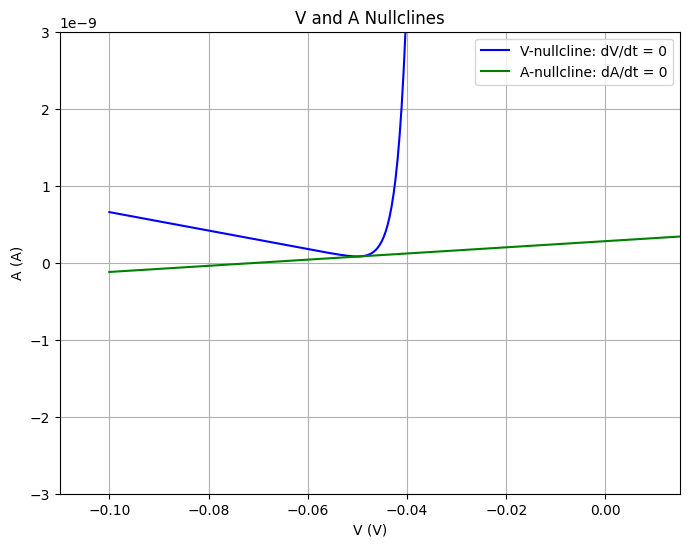

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

C_mem = 200e-12
V_L = -70e-3
g_mem = 12e-9
D_T = 2e-3
V_T = -50e-3
g_A = 4e-9
tau_A = 500e-3
I_ext = 2.972058263184571e-10



#set x-axis range
V_vals = np.linspace(-0.1, 0.1, 500)

# compute the nullclines
# V - nullcline: dV/dt = 0 = -(g_mem/C_mem) * (V_vals - V_L) + (g_mem/C_mem) * D_T * np.exp((V_vals - V_T) / D_T) - A/Cmem + I_ext/C_mem
# Express A explicitly in ters of V: A = C_mem *(-(g_mem/C_mem) * (V_vals - V_L) + (g_mem/C_mem) * D_T * np.exp((V_vals - V_T) / D_T) + I_ext/C_mem)
# C_mem cancels out and we have A =  -g_mem * (V_vals - V_L) + g_mem * D_T * np.exp((V_vals - V_T) / D_T) + I_ext
A_vals_V = -g_mem * (V_vals - V_L) + g_mem * D_T * np.exp((V_vals - V_T) / D_T) + I_ext

# A - nullcline: dA/dt = 0 = (g_A/tau_A) * (V_vals - V_L) - A/tau_A
# Solve for A and tau_A cancels out: A = g_A * (V_vals - V_L)
A_vals_A = g_A * (V_vals - V_L)

# Plot the nullclines
plt.figure(figsize=(8, 6))
plt.plot(V_vals, A_vals_V, color='blue', label="V-nullcline: dV/dt = 0")
plt.plot(V_vals, A_vals_A, color='green', label="A-nullcline: dA/dt = 0")

plt.xlabel("V (V)")
plt.ylabel("A (A)")
plt.title("V and A Nullclines")
plt.legend()
plt.grid(True)

# Set axis limits
plt.xlim(-0.11, 0.015)
plt.ylim(-0.000000003, 0.000000003)

plt.show()

# 5. b) Check numerically

Finding initial bracket...
I_ext = 0.000000e+00: 2 intersections
I_ext = 1.000000e-09: 0 intersections

Narrowing search interval...
Iteration 1: I_ext = 5.0000000000e-10, Intersections: 0
Iteration 2: I_ext = 2.5000000000e-10, Intersections: 2
Iteration 3: I_ext = 3.7500000000e-10, Intersections: 0
Iteration 4: I_ext = 3.1250000000e-10, Intersections: 0
Iteration 5: I_ext = 2.8125000000e-10, Intersections: 2
Iteration 6: I_ext = 2.9687500000e-10, Intersections: 2
Iteration 7: I_ext = 3.0468750000e-10, Intersections: 0
Iteration 8: I_ext = 3.0078125000e-10, Intersections: 0
Iteration 9: I_ext = 2.9882812500e-10, Intersections: 0
Iteration 10: I_ext = 2.9785156250e-10, Intersections: 0
Iteration 11: I_ext = 2.9736328125e-10, Intersections: 0
Iteration 12: I_ext = 2.9711914062e-10, Intersections: 2
Iteration 13: I_ext = 2.9724121094e-10, Intersections: 0
Iteration 14: I_ext = 2.9718017578e-10, Intersections: 2
Iteration 15: I_ext = 2.9721069336e-10, Intersections: 0

Binary search narrow

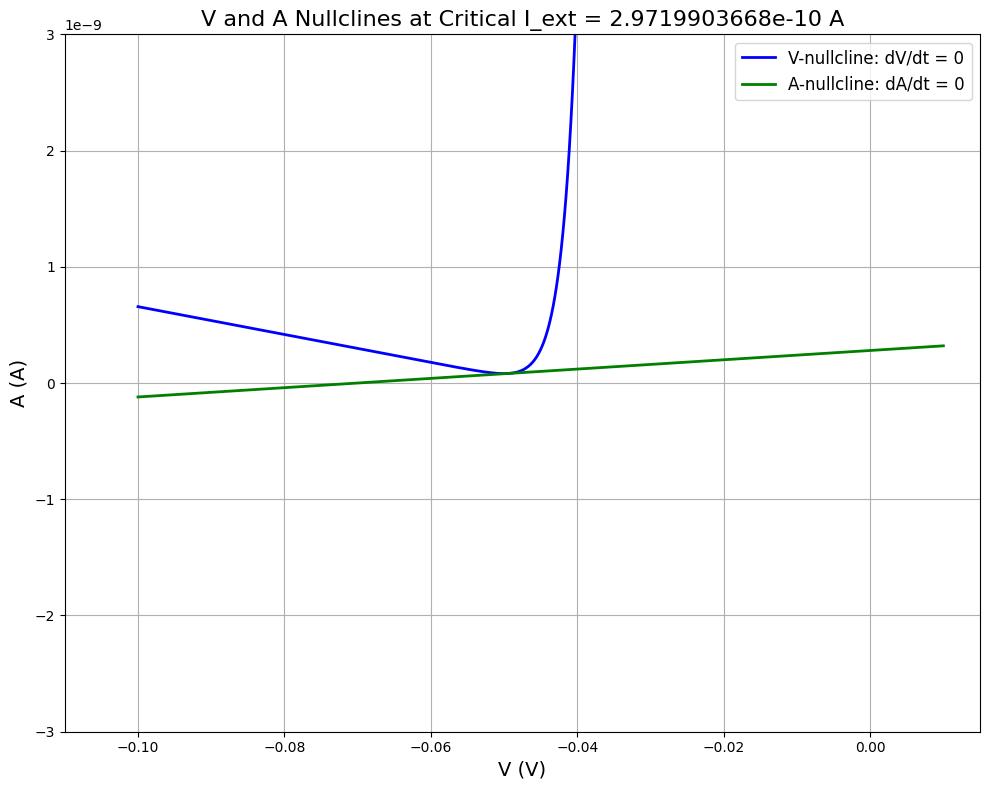

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, minimize_scalar
import time

# start timer
start_time = time.time()

# constants
C_mem = 200e-12
V_L = -70e-3
g_mem = 12e-9
D_T = 2e-3
V_T = -50e-3
g_A = 4e-9
tau_A = 500e-3

# V-nullcline function with I_ext parameter
def V_nullcline(V, I_ext):
    return -g_mem * (V - V_L) + g_mem * D_T * np.exp((V - V_T) / D_T) + I_ext

# A-nullcline function
def A_nullcline(V):
    return g_A * (V - V_L)

# function to find intersections
def intersection_eq(V, I_ext):
    return V_nullcline(V, I_ext) - A_nullcline(V)

# function to count number of intersections using a more robust approach
def count_intersections(I_ext):
    # Define voltage range to search for intersections
    v_range = (-0.09, -0.03)
    num_points = 300

    v_grid = np.linspace(v_range[0], v_range[1], num_points) # creates a dense grid of voltages

    diff_values = [intersection_eq(v, I_ext) for v in v_grid] #  evaluate the difference between the nullclines at each point

    # look for sign changes in the difference, which indicate where the nullclines cross
    intersections = []
    for i in range(len(diff_values)-1):
        if diff_values[i] * diff_values[i+1] <= 0:  # this indicates a sign change
            # sign is detected -> use a root_scalar with the Brentq method to find the precise intersection point
            v_left = v_grid[i]
            v_right = v_grid[i+1]

            try:
                result = root_scalar(intersection_eq, args=(I_ext,),
                                    bracket=[v_left, v_right], method='brentq')
                if result.converged:
                    v_intersect = result.root
                    # additional verification
                    if abs(intersection_eq(v_intersect, I_ext)) < 1e-9:
                        # check if this is a duplicate
                        is_duplicate = False
                        for v in intersections:
                            if abs(v - v_intersect) < 1e-5:
                                is_duplicate = True
                                break
                        if not is_duplicate:
                            intersections.append(v_intersect)
            except:
                # if bracketing fails, try midpoint as estimate
                pass

    return len(intersections), sorted(intersections)

# function to measure how close we are to a tangency
def tangency_metric(I_ext):
    # get intersections
    num_ints, v_ints = count_intersections(I_ext)

    if num_ints == 1:
        # already at tangency
        return 0
    elif num_ints == 0:
        # above critical value - return positive value
        return 1
    elif num_ints == 2:
        # below critical value - measure distance between intersections
        # when approaching tangency, the intersections get closer
        return abs(v_ints[1] - v_ints[0])
    else:
        # unexpected number of intersections
        return 10  # arbitrary large value

# find the bifurcation point using a combination of approaches
def find_bifurcation_point():
    print("Finding initial bracket...")

    # first find the transition from 2 to 0 intersections
    I_ext_low = 0  # start with no external current
    I_ext_high = 1e-9  # start high enough to have no intersections

    n_low, _ = count_intersections(I_ext_low)
    n_high, _ = count_intersections(I_ext_high)

    print(f"I_ext = {I_ext_low:.6e}: {n_low} intersections")
    print(f"I_ext = {I_ext_high:.6e}: {n_high} intersections")

    # verify we have a proper bracket
    if n_low != 2 or n_high != 0:
        # adjust bracket if needed
        if n_low != 2:
            print("Warning: Expected 2 intersections at low I_ext")
        if n_high != 0:
            print("Warning: Expected 0 intersections at high I_ext")
            # try to find a higher value with 0 intersections
            for _ in range(5):
                I_ext_high *= 2
                n_high, _ = count_intersections(I_ext_high)
                print(f"Trying higher I_ext = {I_ext_high:.6e}: {n_high} intersections")
                if n_high == 0:
                    break

    # binary search to narrow down the region
    print("\nNarrowing search interval...")
    max_iterations = 15

    for i in range(max_iterations):
        I_ext_mid = (I_ext_low + I_ext_high) / 2
        n_mid, v_ints = count_intersections(I_ext_mid)

        print(f"Iteration {i+1}: I_ext = {I_ext_mid:.10e}, Intersections: {n_mid}")

        if n_mid == 1:
            # found tangency point directly
            return I_ext_mid, v_ints[0]
        elif n_mid == 2:
            I_ext_low = I_ext_mid
        elif n_mid == 0:
            I_ext_high = I_ext_mid

        # check if we've converged closely enough
        if (I_ext_high - I_ext_low) < 1e-14:
            break

    print(f"\nBinary search narrowed to: [{I_ext_low:.10e}, {I_ext_high:.10e}]")

    # perform a final optimization to find the exact tangency point
    print("Performing fine optimization...")

    # use minimize_scalar to find the I_ext that minimizes our tangency metric
    result = minimize_scalar(tangency_metric,
                            bounds=(I_ext_low, I_ext_high),
                            method='bounded',
                            options={'xatol': 1e-15})

    I_ext_critical = result.x

    # verify the result
    num_ints, v_ints = count_intersections(I_ext_critical)
    print(f"Optimization result: I_ext = {I_ext_critical:.10e}, Intersections: {num_ints}")

    if num_ints == 1:
        return I_ext_critical, v_ints[0]
    else:
        # if we didn't find exactly one intersection, return our best estimate
        # try once more with a slightly adjusted value
        I_ext_adj = (I_ext_low + I_ext_high) / 2
        num_ints, v_ints = count_intersections(I_ext_adj)

        print(f"Adjusted result: I_ext = {I_ext_adj:.10e}, Intersections: {num_ints}")

        if num_ints == 1:
            return I_ext_adj, v_ints[0]
        else:
            # return the critical value but no definitive tangent point
            return I_ext_critical, None

# find the bifurcation point
I_ext_critical, V_tangent = find_bifurcation_point()

print(f"\nSearch completed in {time.time() - start_time:.2f} seconds")

if V_tangent is not None:
    A_tangent = A_nullcline(V_tangent)

    print("\nSaddle-Node Bifurcation Found:")
    print(f"Critical I_ext = {I_ext_critical:.10e} A")
    print(f"Tangent point: V = {V_tangent:.8f} V, A = {A_tangent:.8e} A")
else:
    print(f"\nExact tangent point not found. Best estimate for critical I_ext:")
    print(f"I_ext = {I_ext_critical:.10e} A")

# Plot nullclines with the critical I_ext
V_vals = np.linspace(-0.1, 0.01, 1000)
A_vals_V = V_nullcline(V_vals, I_ext_critical)
A_vals_A = A_nullcline(V_vals)

plt.figure(figsize=(10, 8))
plt.plot(V_vals, A_vals_V, color='blue', linewidth=2, label="V-nullcline: dV/dt = 0")
plt.plot(V_vals, A_vals_A, color='green', linewidth=2, label="A-nullcline: dA/dt = 0")

# If we found a tangent point, mark it
if V_tangent is not None:
    plt.scatter([V_tangent], [A_tangent], color='red', s=100, zorder=5,
                label=f"Tangent Point: ({V_tangent:.6f}, {A_tangent:.6e})")

plt.xlabel("V (V)", fontsize=14)
plt.ylabel("A (A)", fontsize=14)
plt.title(f"V and A Nullclines at Critical I_ext = {I_ext_critical:.10e} A", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(-0.11, 0.015)
plt.ylim(-3e-9, 3e-9)
plt.tight_layout()
plt.savefig('nullclines_at_bifurcation.png', dpi=300)
plt.show()

# Create zoomed view of the tangent point if found
if V_tangent is not None:
    plt.figure(figsize=(10, 8))

    # Define zoom window
    zoom_factor = 0.005
    V_min = V_tangent - zoom_factor
    V_max = V_tangent + zoom_factor

    # Generate points within the zoom window
    V_zoom = np.linspace(V_min, V_max, 1000)
    A_zoom_V = V_nullcline(V_zoom, I_ext_critical)
    A_zoom_A = A_nullcline(V_zoom)

    plt.plot(V_zoom, A_zoom_V, color='blue', linewidth=2, label="V-nullcline")
    plt.plot(V_zoom, A_zoom_A, color='green', linewidth=2, label="A-nullcline")
    plt.scatter([V_tangent], [A_tangent], color='red', s=100, zorder=5,
                label=f"Tangent Point")

    plt.xlabel("V (V)", fontsize=14)
    plt.ylabel("A (A)", fontsize=14)
    plt.title(f"Zoomed View of Tangent Point (I_ext = {I_ext_critical:.10e} A)", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('bifurcation_point_zoomed.png', dpi=300)
    plt.show()

So, in theory we need an excitatpry presynaptic current input from a number of neurons in a network of I_ext = 0.2972 nA or 297.2 pA to triger spiking behavior in a neuron.

# Step 6. Find out the EPSC (Excitatory post synaptic current) contribution of a single neuron in my model

# 6. a) Calculate the theoretical EPSC needed to trigger a spike (reach I_ext)

In [ ]:
I_ext = 2.9719903668e-10

#we want the contributions of approximately 10 neurons to trigger a post synaptic event

I_syn_exc = I_ext / 10

print("Every neuron should create a synaptic current contribution of", I_syn_exc, "A to I_ext for the post synaptic neuron to spike.")

Every neuron should create a synaptic current contribution of 2.9719903668e-11 A to I_ext for the post synaptic neuron to spike.


# 6. b) Minimal neuron model (2 neurons, 1 synapse)

In [ ]:
!pip install brian2

from brian2 import *
import brian2 as b2

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.animation as animation

import collections


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00


Synapse weight: 10.0
g_syn_max_exc: 10. nS


WARNING    'dt' is an internal variable of group 'synapses_1', but also exists in the run namespace with the value 0.01. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


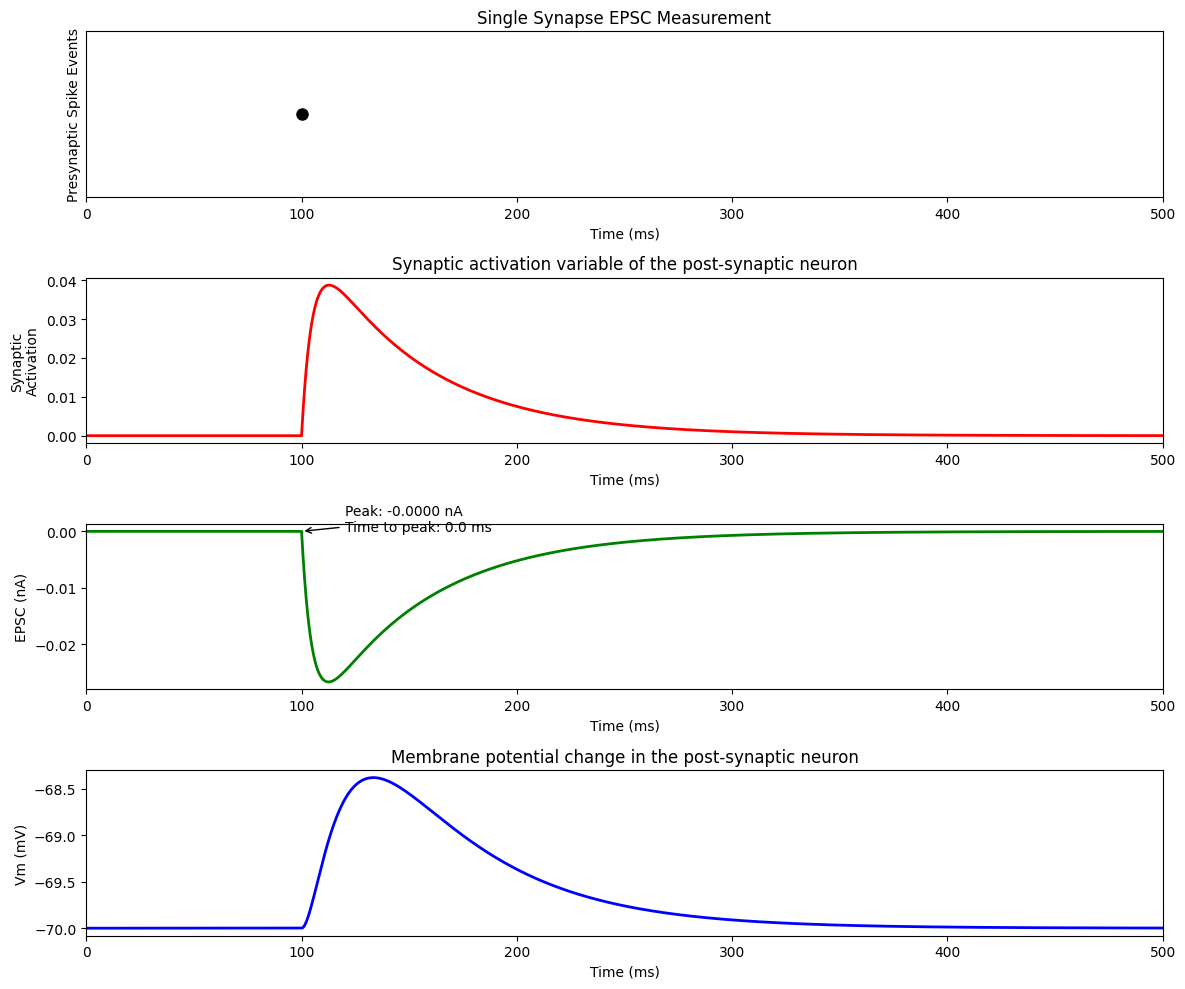

Spike detected at: 100.0 ms

DEBUG INFO:
EPSC values in window: min=-0.026730, max=-0.000000
Window size: 10001 data points
Selected peak at index 1254 with value -0.026730 nA

EPSC Characteristics:
Peak EPSC: -0.026730 nA
Time to peak: 12.54 ms
Approximate decay time constant: 55.13000000000001
Total charge transfer: -1.4616 nA·ms (equivalent to pC)

Critical current from bifurcation analysis: 2.971990e-10 A
Approximate neurons needed to reach threshold: 11.1
Note: This assumes synchronous inputs


In [ ]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

start_scope()

C_mem = 200*pF
V_L = -70*mV
g_mem = 12*nS
D_T = 2*mV
V_T = -50*mV
V_syn_exc = 0*mV
tau_r = 5*ms
tau_d = 50*ms
g_syn_max_exc = 0.01*uS
W0 = 10
g_A = 4*nS
tau_A = 500*ms
incr_A = 0.02*nA

I_ext_critical = 2.9719903668e-10


# **Simplified setup for isolated EPSC measurement**
N_pre = 1  #one presynaptic neuron
N_post = 1  #one post synaptic neuron
Vt = V_T+10*mV
Vr = -75*mV
refPeriod = 0*ms
simulation_time = 500*ms

# Postsynaptic neuron equations (subthreshold dynamics only)
eqs_post = '''
dV/dt = 1/C_mem * (I_leak + I_exp - I_syn_exc) : volt # to get only EPSC in isolation, observe only subthreshold events, omit others
dA/dt = 1/tau_A*(g_A*(V-V_L)-A) : ampere
I_leak = -g_mem*(V-V_L) : ampere
I_exp = g_mem*D_T*exp((V-V_T)/D_T) : ampere
I_syn_exc = g_syn_max_exc * s_tot_exc * (V - V_syn_exc) : ampere
s_tot_exc : 1
'''

# Presynaptic neuron (simple spiking model only)
eqs_pre = '''
dV/dt = (V_rest - V) / tau_v : volt # basic leaky integrator, manually triggered via a network operation
                                    # it's only job is to generate a spike at a given time to activate the synapse
V_rest : volt
tau_v : second
'''

# Synapse model
eqs_synapse = '''
ds_syn_exc/dt = x_exc : 1 (clock-driven)
dx_exc/dt = 1/(tau_r*tau_d) *( -(tau_r+tau_d)*x_exc - s_syn_exc ) : Hz (clock-driven)
s_tot_exc_post = w*s_syn_exc : 1 (summed)
w : 1
'''

# define neuron 'populations'
post_neuron = NeuronGroup(N_post, eqs_post, method='euler')
post_neuron.V = V_L  # starts at resting potential
post_neuron.A = 0*nA

pre_neuron = NeuronGroup(N_pre, eqs_pre, threshold='V>-50*mV', reset='V=-70*mV', method='euler')
pre_neuron.V = V_L
pre_neuron.V_rest = V_L
pre_neuron.tau_v = 10*ms

# define one synapse connection
synapse = Synapses(pre_neuron, post_neuron, model=eqs_synapse, on_pre='x_exc += 1*Hz', method='rk4')
synapse.connect()
synapse.w = W0

print(f"Synapse weight: {synapse.w[0]}")
print(f"g_syn_max_exc: {g_syn_max_exc}")

# set up monitors
I_syn_mon = StateMonitor(post_neuron, 'I_syn_exc', record=True) # monitor the current response of the post synaptic neuron
V_mon = StateMonitor(post_neuron, 'V', record=True) # monitor the voltage of the post synaptic neuron
s_tot_mon = StateMonitor(post_neuron, 's_tot_exc', record=True) # monitor the amount of available neurotransmitter receptors in the post synaptic neuron
spike_mon = SpikeMonitor(pre_neuron) # spike monitor for th epre synaptic neuron

# monitors for more variables to debug
s_syn_mon = StateMonitor(synapse, 's_syn_exc', record=True)
x_exc_mon = StateMonitor(synapse, 'x_exc', record=True)

# **Artificially generated spike in pre-synaptic neuron -> create a brief pulse to make the presynaptic neuron spike
@network_operation(dt=1*ms) #decorator which allows us to perform operations that aren't directly described in the differential equations
                            # injects costum code that will be executed at regular intervals during the simulation

def update_input(t): # <- function it decorates
    if 100*ms <= t < 101*ms:  # checks if t is at the time when we want to force a spike
        pre_neuron.V = 20*mV  # set to some voltage above threshold

# run simulation
defaultclock.dt = 0.01*ms
run(simulation_time)

# plot results
plt.figure(figsize=(12, 10))

# Plot 1: Presynaptic spikes
plt.subplot(411)
if len(spike_mon.t) > 0:
    plt.plot(spike_mon.t/ms, np.ones_like(spike_mon.t), 'ko', markersize=8)
plt.ylabel('Presynaptic Spike Events')
plt.yticks([])
plt.xlim(0, simulation_time/ms)
plt.xlabel('Time (ms)')
plt.title('Single Synapse EPSC Measurement')

# Plot 2: Synaptic activation (s_tot)
plt.subplot(412)
plt.plot(s_tot_mon.t/ms, s_tot_mon.s_tot_exc[0], 'r', linewidth=2)
plt.ylabel('Synaptic\nActivation')
plt.xlim(0, simulation_time/ms)
plt.xlabel('Time (ms)')
plt.title('Synaptic activation variable of the post-synaptic neuron')

# Plot 3: Synaptic current
plt.subplot(413)
plt.plot(I_syn_mon.t/ms, I_syn_mon.I_syn_exc[0]/nA, 'g', linewidth=2)
plt.ylabel('EPSC (nA)')
plt.xlabel('Time (ms)')
plt.xlim(0, simulation_time/ms)

# find EPSC measurements
if len(spike_mon.t) > 0: # have any spikes occured in the pre-synaptic neuron
    spike_time = spike_mon.t[0]/ms # retrieve the time of the spike and turn to ms
    post_spike_indices = np.where(I_syn_mon.t/ms >= spike_time)[0] # limits analysis to only the region after the presynaptic spike occured
    if len(post_spike_indices) > 0: # make sure there are data points after the spike
        epsc_values = I_syn_mon.I_syn_exc[0][post_spike_indices]/nA # retrieve EPSC values from the post-synaptic neuron after the spike and turn to nA
        peak_epsc = np.max(epsc_values) # get the maximum amplitude of the EPSC
        peak_time = I_syn_mon.t[post_spike_indices[np.argmax(epsc_values)]]/ms - spike_time # obtain the delay between pre synaptic spike and epsc peak

        # annotate peak
        plt.annotate(f'Peak: {peak_epsc:.4f} nA\nTime to peak: {peak_time:.1f} ms',
                    xy=(spike_time + peak_time, peak_epsc),
                    xytext=(spike_time + peak_time + 20, peak_epsc * 0.8),
                    arrowprops=dict(arrowstyle="->"))

# Plot 4: Membrane potential change
plt.subplot(414)
plt.plot(V_mon.t/ms, V_mon.V[0]/mV, 'b', linewidth=2)
plt.ylabel('Vm (mV)')
plt.xlabel('Time (ms)')
plt.xlim(0, simulation_time/ms)
plt.title('Membrane potential change in the post-synaptic neuron')
plt.tight_layout()
plt.savefig('single_epsc_analysis.png', dpi=300)
plt.show()

# Calculate metrics with improved detection
if len(spike_mon.t) > 0:
    spike_time = spike_mon.t[0]/ms
    print(f"Spike detected at: {spike_time} ms")

    # Use a window after the spike to find the EPSC
    start_time = spike_time
    end_time = spike_time + 100  # Look at 100ms after the spike

    post_spike_indices = np.where((I_syn_mon.t/ms >= start_time) & (I_syn_mon.t/ms <= end_time))[0]

    if len(post_spike_indices) > 0:
        # Extract synaptic current values
        epsc_values = I_syn_mon.I_syn_exc[0][post_spike_indices]/nA

        # Check if current is positive or negative
        abs_epsc_values = np.abs(epsc_values)
        max_idx = np.argmax(abs_epsc_values)

        # Get peak value and its time
        peak_epsc = epsc_values[max_idx]
        peak_time = I_syn_mon.t[post_spike_indices[max_idx]]/ms - spike_time

        # Print diagnostics
        print("\nDEBUG INFO:")
        print(f"EPSC values in window: min={np.min(epsc_values):.6f}, max={np.max(epsc_values):.6f}")
        print(f"Window size: {len(post_spike_indices)} data points")
        print(f"Selected peak at index {max_idx} with value {peak_epsc:.6f} nA")

        # Calculate charge transfer (area under curve)
        dt = defaultclock.dt/ms  # Time step in ms
        charge_transfer = np.sum(epsc_values) * dt  # This is in nA·ms = pC

        # Estimate decay time constant
        decay_start = max_idx
        if decay_start < len(epsc_values):
            decay_curve = epsc_values[decay_start:]
            decay_times = I_syn_mon.t[post_spike_indices[decay_start:]]/ms - spike_time

            # Find time to reach 37% of peak
            if len(decay_curve) > 0:
                target_val = peak_epsc * 0.37
                decay_idx = np.argmin(np.abs(decay_curve - target_val)) if len(decay_curve) > 0 else None
                decay_tau = decay_times[decay_idx] - peak_time if decay_idx is not None else "N/A"

                print(f"\nEPSC Characteristics:")
                print(f"Peak EPSC: {peak_epsc:.6f} nA")
                print(f"Time to peak: {peak_time:.2f} ms")
                print(f"Approximate decay time constant: {decay_tau}")
                print(f"Total charge transfer: {charge_transfer:.4f} nA·ms (equivalent to pC)")

                # Calculate number of neurons needed to reach threshold
                peak_epsc_abs = abs(peak_epsc)
                if peak_epsc_abs > 1e-12:  # Ensure it's not too close to zero
                    neurons_to_threshold = I_ext_critical / (peak_epsc_abs * 1e-9)
                    print(f"\nCritical current from bifurcation analysis: {I_ext_critical:.6e} A")
                    print(f"Approximate neurons needed to reach threshold: {neurons_to_threshold:.1f}")
                    print("Note: This assumes synchronous inputs")
                else:
                    print("EPSC too small to make reliable estimate of neurons needed")



According to EPSC analysis from the mininmal model, and the phase plane analysis, if I _ext = 2.9719903668e-10 A, we need approx. 11 neurons to spike inputs into a postsynaptic neuron for it to spike.